# ML PIPELINE

1. Data Ingestion
2. EDA 
3. Preprocessing or Feature Engineering 
4. Model Building 
5. Evaluation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge ,Lasso,ElasticNet
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error
from sklearn.datasets import make_regression
import plotly.express as px


In [2]:

df =pd.read_csv('placement.csv')

based on the cgpa(input variable / independant feature ) we are gonna predict the package (target variable / dependant feature )

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0.5, 1.0, 'Linear relationship between CGPA and Package')

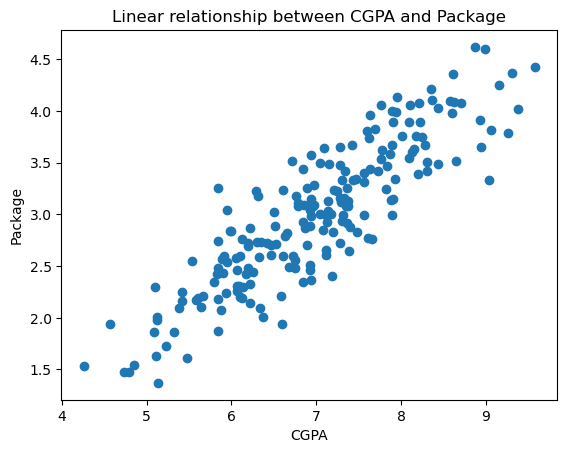

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Linear relationship between CGPA and Package')

we can use the LINEAR REGRESSION on this data

Segregating X and Y into independant and dependant feature 

In [5]:
X=df.iloc[: , 0:1]  #independant feature 
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [6]:
Y= df.iloc[:,-1]   #dependant feature 
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
df.shape

(200, 2)

Random Sampling

In [8]:
X_train ,X_test ,y_train ,y_test=train_test_split(X,Y , test_size=0.15,random_state=42)

random state = 42 ====>fix the random sample and we get the data same throghtout.
Otherways we get diffrent random sample each time we run it

If dont fix the random sample , we get different accuracy value .So inorder to prevent that, we fix the random state 

In [9]:
X_train.shape

(170, 1)

In [10]:
X_test.shape

(30, 1)

In [11]:
X_train

,cgpa
9,8.31
18,6.94
55,8.20
75,6.97
150,6.30
...,...
106,6.13
14,7.73
92,7.90
179,7.14


In [12]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


# **1.SIMPLE LINEAR REGRESSION**

Creating an object of the LinearRegression class

In [13]:
model = LinearRegression()

Fitting the model 

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.score(X_train,y_train)

0.7741811633951949

* Calculated the R2 value : 0.7741811633951949 

* If we are getting R2 value near to 1 , that model will be a best model 

* model.score(X_train, y_train): This method calculates the score or performance of the model on the training data (X_train and y_train). 

* **It evaluates how well the model fits the data it was trained on.**

* Accuracy of the training data

* It provides an indication of the model's performance on the data it has already seen during training.

* This can help detect issues like overfitting.

In [16]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


bulk prediction as shown below;

In [17]:
y_pred = model.predict(X_test)
y_pred

array([2.78511178, 3.13682871, 3.1992301 , 2.39935773, 3.52258277,
       3.76084262, 3.16519298, 2.55252478, 3.17653869, 3.48854564,
       1.92283802, 2.35964775, 3.68142267, 2.76242037, 3.47152708,
       3.04606305, 2.33695634, 3.20490296, 2.18946214, 3.31268718,
       2.46175912, 2.90424171, 3.31836003, 2.87587744, 3.33537859,
       2.2064807 , 1.44064545, 2.71703754, 3.18221154, 2.33695634])

In [18]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
Name: package, dtype: float64

Comparing actual value and predicted value 
--                                     --

In [19]:
r2_score(y_test,y_pred)

0.7804129897987835

* Calculated r2  (coefficient of determination) value for the test value and predicted value


* r2_score(y_test, y_pred): This function calculates the R-squared (R2) score based on the predictions (y_pred) made by the model on a separate test dataset (y_test). 

* It assesses how well the model's predictions match the actual values in a test dataset, which the model has not seen during training.

* It is used to evaluate how well the model generalizes to new, unseen data.

* It assesses the model's predictive accuracy on a separate test dataset.

* It is a common method for regression models to quantify their ability to make accurate predictions on real-world data.

---------------------------------------------------------------

### **And there is no overfitting since the r2 value of actual V/S prediction is approximately the same**

Here  low bias (training) and low variance (testing)

--------------------------------------------------------

* Regression equation: Y = mX + C 
* ; m is the coefficient 
* ; C is the intercept


In [20]:
model.coef_  #m 

array([0.56728537])

In [21]:
model.intercept_ #C

-0.9759902354422207

Prediction of 'packages' corresponding to the following 'CGPA'.

1. 8.26
2. 9.01
3. 10.00

In [22]:
model.predict([[8.26]])

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.70978694])

In [23]:
model.predict([[9.01]])

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.13525097])

In [24]:
model.predict([[10.00]])

d:\ANACONDA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.69686349])

In [25]:
y_ = 0.56728537* X - 0.9759902354422207 # predicted value 

In [26]:
y_

,cgpa
0,2.932606
1,1.928511
2,3.460181
3,3.233267
4,2.960970
...,...
195,2.955297
196,2.365321
197,3.114137
198,3.352397


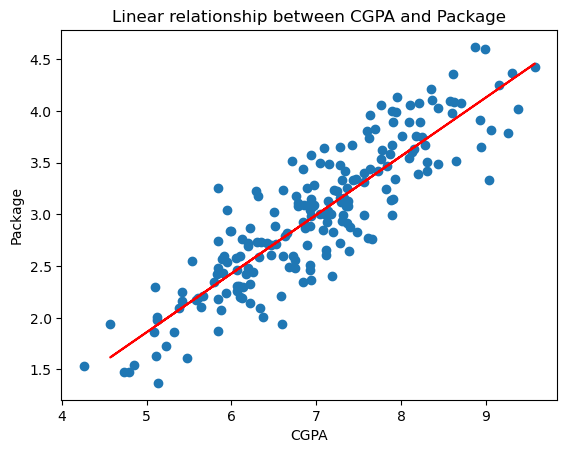

In [27]:
plt.scatter(df['cgpa'] , df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Linear relationship between CGPA and Package')
plt.plot(X_train,model.predict(X_train),color='red')

* X_train: This is the input data used for training your machine learning model. It represents the independent variables or features.

* model.predict(X_train): This is where your trained machine learning model makes predictions based on the input data. In this case, it's using your model to predict the target variable or dependent variable for the training data X_train.

* plt.plot(...): This is a function from a plotting library like Matplotlib, used to create a line plot.

* color='red': This part specifies the color of the line in the plot, and it's set to red in this case.

* So, in simple terms, the code creates a line plot that shows how your machine learning model's predictions (in red) compare to the actual target values in the training data X_train. This plot helps you visualize how well your model fits the training data by comparing its predictions to the actual data points. If the red line closely follows the actual data points, it suggests that your model is doing a good job of fitting the training data.

---------------------------------------------------------------------------

# **2.MULTIPLE LINEAR REGRESSION**

Data generater from sklearn

In [28]:
X ,y  = make_regression(n_samples =150,n_features=2,n_targets=1,noise=40)

In [29]:
X

array([[ 1.29763769,  0.12444897],
       [-0.92891673, -0.47216058],
       [ 0.03781431, -0.25609335],
       [ 1.29173962,  0.27014662],
       [ 0.77958192,  1.97876519],
       [-1.88270817, -0.29552164],
       [ 1.41690405, -1.03567613],
       [-0.58674505,  1.65614323],
       [ 0.46562362,  1.81892134],
       [-0.51268458, -1.30111609],
       [-0.07263829, -0.66710899],
       [-0.10402004, -0.70092314],
       [ 0.18788435, -0.04605065],
       [-1.01264298,  1.29866695],
       [-0.85693955, -0.70764345],
       [-1.57848985,  0.64082262],
       [-0.5422059 ,  0.03796251],
       [-0.05873659, -2.72397967],
       [ 0.12011347,  0.17699661],
       [ 1.38322984, -0.17237359],
       [-0.55696847,  0.36347029],
       [-0.26525691, -1.46147528],
       [ 1.44911445,  0.59063316],
       [ 0.26354732,  1.91915214],
       [ 0.61754487, -0.27189318],
       [-1.50427044, -0.62623727],
       [-0.09728023,  0.09622148],
       [-0.07775699,  0.53743691],
       [-0.39762085,

In [30]:
y

array([  24.99691099, -118.74000075,   52.1063184 ,   62.12980242,
        202.98831441,  -79.34625447,  -41.81263373,  233.95385003,
        254.58444579,  -94.18128415,  -22.45237398,  -40.13205078,
        -10.47817007,   91.2478855 ,  -83.59108922,  -38.64535724,
          6.76053574, -230.31836196,  -24.87500084,  -16.37984716,
         35.9284736 , -237.36158905,   99.43342628,  191.62148001,
        -27.18847305,  -92.56193566,   90.15051606,   36.86802232,
        122.14656712,   37.45964387,  -99.82757589,  -91.14936897,
         74.51106405,  -22.90366523,   21.95329569,  -10.04126422,
       -205.5796144 ,  195.48292224,  149.38504476,  -37.65183091,
        -39.341362  ,  -10.58305227,  137.74828638, -244.37559426,
         36.25091694,  -65.20750384,  -57.14202853,  -24.97071665,
         -4.50705518,  -60.93922582,  -69.91020423,   11.22423373,
         10.08474736,   97.20701897,  -23.55663705,  -14.08599666,
         -7.75887659,   98.93360814,   80.92474371,  331.06619

Converting it into a dataframe 

In [31]:
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
df

,feature1,feature2,target
0,1.297638,0.124449,24.996911
1,-0.928917,-0.472161,-118.740001
2,0.037814,-0.256093,52.106318
3,1.291740,0.270147,62.129802
4,0.779582,1.978765,202.988314
...,...,...,...
145,-0.956941,-0.777839,-92.914607
146,0.182683,-0.380251,-23.497842
147,-0.620003,0.196978,-44.074054
148,1.099587,0.573037,53.944875


In [32]:
df.shape

(150, 3)

plotting the linear relationship between the feature 1 , feature 2 , and target value 

In [33]:
px.scatter_3d(df,x='feature1',y='feature2',z='target')

Splitting the dataset into train and test dataset

In [34]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.15,random_state=5)

In [35]:
X_train.shape

(127, 2)

In [36]:
y_train.shape

(127,)

creating an object of the LinearRegression() class

In [37]:
model2= LinearRegression()

Fitting the model on train data

In [38]:
model2.fit(X_train,y_train)

LinearRegression()

Calculated the accuracy on the training data 

In [39]:
model2.score(X_train,y_train)

0.8668444493099241

Since r2 > 0.5 ---> low bias

Prediction using the test data

In [40]:
y_pred2=model2.predict(X_test)
y_pred2

array([  96.6125015 ,   98.96219329,  203.45206588,  114.98490586,
        159.10480937,   72.43805812,  -69.50086405,   72.55524862,
       -100.94398514,   91.61612511,  -16.16404844,   73.99259718,
       -148.82951467,  -12.65859578,    8.49514415,  190.75475611,
        -86.88078945,  -59.16361503, -143.11460133,    3.49353682,
         81.77168668, -120.09288051,   20.41237226])

calculating the accuracy on the test data over the actual value 

In [41]:
r2_score(y_test,y_pred2)

0.8636775336703382

Since r2 value is higher than that of th training data ----> low variance 

Equation for the multilple linear regression ;

y = m1X1 + m2X2 + C 

In [42]:
model2.coef_ # 2 coefficients ---> m1 and m2 

array([29.4358103 , 94.15517817])

In [43]:
model2.intercept_ #vintercept ---> c

2.2989156598828266

In [44]:
mse=mean_squared_error(y_test,y_pred2)
mse

1833.9540812072667

This is the validation loss.


The lower the value better the model accuracy will be 

In [45]:
mean_absolute_error(y_test,y_pred2)

31.06546739657674

In [46]:
np.sqrt(mse)

42.82469008886424

------------------------------------------------------------------

# **3.RIDGE REGRESSION**

Loading the inbuilt dataset from sklearn 

In [47]:
from sklearn.datasets import load_diabetes

collecting the data in the dict format to a variable 

In [48]:
data=load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [49]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [50]:
X=data.data

In [51]:
y=data.target

In [52]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=45)

In [53]:
X_train

array([[-0.08906294, -0.04464164, -0.01159501, ...,  0.03430886,
         0.02268774, -0.00936191],
       [-0.03457486, -0.04464164, -0.0374625 , ..., -0.00259226,
        -0.03074792, -0.07149352],
       [ 0.01628068,  0.05068012, -0.04500719, ..., -0.03949338,
        -0.03074792,  0.03620126],
       ...,
       [ 0.01628068, -0.04464164,  0.02612841, ..., -0.03395821,
        -0.05140387, -0.02593034],
       [-0.09632802, -0.04464164, -0.06979687, ..., -0.03949338,
        -0.04688253, -0.07977773],
       [ 0.08166637,  0.05068012,  0.00672779, ...,  0.09187461,
         0.05471997,  0.00720652]])

In [54]:
y_train

array([206., 128., 102.,  88., 346., 268., 198.,  96.,  78.,  87., 170.,
       292., 161., 118., 202.,  53., 103., 129.,  95., 179.,  89.,  68.,
       151., 275.,  90., 281., 150., 111., 116.,  66., 208., 173., 262.,
       110.,  94., 113.,  83., 190.,  96., 303.,  73., 293., 275., 197.,
       221., 237.,  50., 142., 200., 151., 109.,  70., 152., 261., 308.,
       195., 129., 214., 122.,  95., 259.,  63., 104., 143.,  78., 317.,
       281., 173.,  93., 272., 129.,  77.,  75.,  87., 139., 310., 233.,
        88., 263.,  59., 265., 199., 236., 103., 179., 210., 168., 123.,
       128.,  47., 277.,  60.,  85., 237., 192., 230., 225., 235., 241.,
        55., 295., 257.,  71., 110., 189., 151.,  58.,  97., 229., 120.,
       280., 332.,  49., 201.,  54., 288., 259., 146., 154., 336., 166.,
       258., 219.,  97., 124., 296., 275., 279.,  81., 170.,  52., 197.,
       297., 121., 178., 170., 109.,  77.,  65.,  71.,  47., 111., 100.,
        91.,  94., 104., 150., 152.,  44., 104.,  8

In [55]:
model3=LinearRegression()

In [56]:
model3.fit(X_train,y_train)

LinearRegression()

In [57]:
model3.score(X_train,y_train)

0.5159857758740993

Since r2 score is low ---> High bias 

In [58]:
y_pred3 = model3.predict(X_test)
y_pred3

array([226.51848598, 157.46329293,  89.86172648, 207.92043638,
       175.27464325, 146.48196423, 131.11782081,  97.37923306,
       102.94499199, 181.69238112, 237.97531281, 134.74726724,
       189.44205531,  59.92873145, 179.98730177, 117.78561801,
       120.30969646, 126.66229732, 165.19425279, 147.78162151,
       145.4387221 , 124.41329425,  51.96058948, 227.75415791,
       218.10133602, 129.82865712, 160.13538356, 201.17200936,
       184.84143661,  68.90970369, 237.00685674,  58.17158783,
       154.39979192, 119.15941043, 234.0319742 , 172.80143208,
       139.94775146, 169.99263492, 214.59145267, 220.47784209,
       128.98250674, 186.20992149, 162.87053192, 179.77640803,
       107.76869146, 249.52929292, 140.92355113,  32.74846723,
       177.96181001, 145.76575416, 291.96774118, 125.71074727,
       107.27012754, 156.10001536, 115.93096259, 160.35263722,
       229.48001183, 173.38808746, 159.87971544, 123.05044568,
        88.54923021, 122.87202843, 169.12811086, 101.97

In [59]:
r2_score(y_test,y_pred3)

0.5188113124539249

Here the underfitting situation occurs 

So we use the regularization technique

In [60]:
model4 = Ridge()

In [61]:
model4.fit(X_train,y_train)

Ridge()

In [62]:
model4.score(X_train,y_train)

0.43493675504046025

In [63]:
y_pred4=model4.predict(X_test)

In [64]:
r2_score(y_test,y_pred4)

0.45671008338777064

Still get an underfitted model

In [65]:
model5 = Ridge(alpha=0.0001)

In [66]:
model5.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [67]:
model5.score(X_train,y_train)

0.5159846709672167

In [68]:
y_pred5=model5.predict(X_test)
y_pred5

array([226.48500746, 157.37002705,  89.85527246, 207.82093744,
       175.2396515 , 146.40814563, 131.1039    ,  97.31966166,
       102.92089276, 181.66241548, 238.01422527, 134.66278962,
       189.42760028,  59.94051208, 179.91268305, 117.75422356,
       120.35276363, 126.64959105, 165.12891835, 147.75850494,
       145.32945577, 124.37682108,  52.17147328, 227.75391379,
       218.45969252, 129.75909256, 160.26682871, 201.19467665,
       184.71555103,  68.9845619 , 236.94630225,  58.26201135,
       154.49141707, 119.17470898, 233.95785942, 172.90019385,
       139.89728382, 169.97195312, 214.5625562 , 220.44720233,
       128.97262779, 186.18983795, 162.80708259, 179.69281077,
       107.87266239, 249.54597038, 140.83556741,  32.87242302,
       177.88770166, 145.73513482, 291.94463828, 125.74105214,
       107.2820458 , 156.03199737, 115.90247833, 160.30429895,
       229.37000106, 173.44328781, 159.86529588, 122.98049214,
        88.57807531, 122.87739877, 169.15246697, 101.92

In [69]:
r2_score(y_test,y_pred5)

0.518973263588496

In [70]:
model5.coef_

array([  23.51763492, -247.31766656,  492.28244914,  329.3317593 ,
       -957.46324421,  562.90310325,  176.71070198,  254.47033329,
        789.10867561,   89.41375823])

In [71]:
model5.intercept_

152.13492030963658

Underfitting is not solved using the above Ridge regression

In [117]:
X ,y  = make_regression(n_samples =200,n_features=1,n_informative=1,n_targets=1,noise=15,random_state=13)

In [118]:
X

array([[ 0.29202649],
       [ 0.7473716 ],
       [-0.71239066],
       [-1.61510796],
       [ 0.86281689],
       [-0.45375238],
       [-0.98416078],
       [-0.23242587],
       [-0.24332625],
       [-0.84447641],
       [-0.53032741],
       [ 2.01522083],
       [-0.55340262],
       [ 1.89274222],
       [ 0.71332542],
       [ 0.86837751],
       [-0.49429865],
       [ 0.45053118],
       [ 0.29164051],
       [-0.92833523],
       [ 2.05369324],
       [ 0.0046139 ],
       [ 0.93846047],
       [-0.51082623],
       [-2.18711527],
       [ 0.05569219],
       [ 1.17903474],
       [ 0.08086619],
       [ 0.56284679],
       [-1.81842142],
       [-0.64379706],
       [ 0.14375578],
       [ 0.51432886],
       [ 0.91998513],
       [ 0.95283061],
       [-0.05753239],
       [-0.26424741],
       [-0.91134478],
       [ 0.50116769],
       [ 0.40067367],
       [ 0.56465429],
       [ 1.350306  ],
       [ 0.21745166],
       [-1.63909341],
       [-1.26160595],
       [ 1

In [119]:
y

array([-13.94388933,   5.72188174, -14.89825331, -44.93784372,
        -3.43445022, -16.40672309, -36.41438193,   1.15169928,
        15.70049703, -19.55846168, -15.25704022,  65.46236298,
       -22.47040936,  40.27821168,  32.79247991,  22.95953059,
       -20.49744671,  -2.28752933,   4.88353475, -17.1430076 ,
        56.89323439,  -5.08093613,   5.50342346,  -9.98240884,
       -56.89721068, -27.51985414,  28.46903598, -28.4562501 ,
        13.71128529, -29.65861559, -10.65936055,  10.11167835,
        32.86095852,  41.24185518,  16.11016357,  -4.21986324,
       -26.08589343,  -5.50991516,   8.53196524,   7.71957704,
        13.4283375 ,  55.64819389,  17.73865045, -25.3591337 ,
       -31.72589415,  19.42916151,  -1.73882018, -39.76101698,
       -36.27108179,  37.73605438,   0.9071552 ,  -3.22591105,
        14.84399222,  15.180325  ,  15.5649084 , -20.26701638,
        13.33786025,  -2.90665468,  10.7339892 ,  23.96978953,
       -37.24266832, -24.05500783,  -7.87438373,   8.01

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Text(0, 0.5, 'Feature 2')

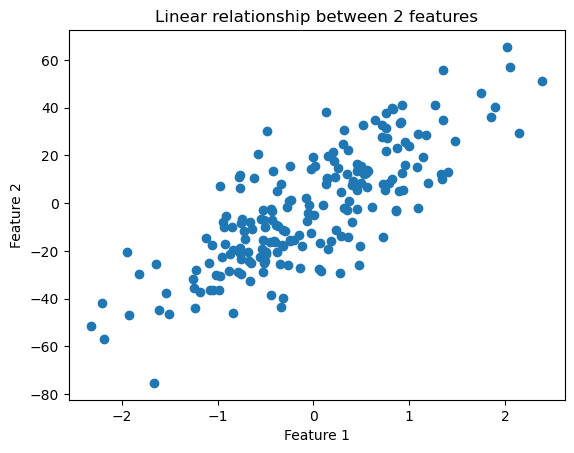

In [121]:
plt.scatter(X,y)
plt.title('Linear relationship between 2 features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [122]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[22.41152336]
-2.3928041009500935


In [123]:
reg.score(X_train,y_train)

0.6285746491199733

In [124]:
pred_reg = reg.predict(X_test) 
pred_reg

array([ 14.68994978, -39.12738438,   0.46025634, -19.51596926,
         1.06315573, -36.29796774,  -9.44925323,  16.90825473,
        -1.94522531,   3.83392741,  -0.12319393, -14.27824918,
       -23.1982107 , -30.11222113,   8.83912724, -19.67138329,
       -51.85205756,  51.09780516, -27.50507002, -17.52898798,
       -28.95984543,  10.26195867, -10.68766923, -12.02745259,
        15.87248531,   1.07882146, -25.18536875,  -8.62622231,
       -12.56208619,  24.0311606 , -24.3045282 , -36.88557558,
        17.89346886,  30.74679585,   8.04330042,   9.88687989,
        16.22905746, -14.20343606,  -7.80530605,   5.67605672])

In [125]:
r2_score(y_test,pred_reg)

0.6181341840867605

# **4.LASSO REGRESSION**

In [155]:
model6=Lasso()

In [156]:
model6.fit(X_train,y_train)

Lasso()

In [157]:
model6.score(X_train,y_train)

0.6262877609525863

In [158]:
y_pred6 = model6.predict(X_test)
y_pred6

array([ 13.63856303, -36.93263884,   0.2671705 , -18.50413716,
         0.83370445, -34.27388582,  -9.04462126,  15.72306515,
        -1.99321827,   3.43734984,  -0.28108745, -13.58234378,
       -21.96427465, -28.46124858,   8.14064805, -18.65017699,
       -48.88979032,  47.85038405, -26.01135457, -16.63700582,
       -27.37838142,   9.4776577 , -10.20833898, -11.46730983,
        14.74977086,   0.84842527, -23.8315721 ,  -8.27123359,
       -11.96969561,  22.41633445, -23.00386173, -34.82605056,
        16.64885354,  28.72689872,   7.39282358,   9.12520278,
        15.08483543, -13.5120432 ,  -7.49983302,   5.16836634])

In [159]:
r2_score(y_test,y_pred6)

0.6212919971436192

# **5.ELASTIC NET REGRESSION**

In [173]:
X , y = make_regression(n_features=2,random_state=0)

In [178]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=0)

In [179]:
model7=ElasticNet(random_state=0)

In [180]:
model7.fit(X_train,y_train)

ElasticNet(random_state=0)

In [181]:
model7.score(X_train,y_train)

0.8688235608979287

In [182]:
y_pred7 = model7.predict(X_test)
y_pred7

array([ -37.43891911,   48.04179855,   88.19052879,  -19.05663862,
        -48.86980335,   86.51648904,  -74.66184805,  -48.05845748,
        163.08698093,  -65.23247175,  -91.8262274 ,   27.8398547 ,
       -103.56214023,   10.52076312,  -28.31974849,   62.27515676,
         67.73629968,   30.80034069,  109.75412205,  157.23192338])

In [183]:
r2_score(y_test,y_pred7)

0.859843606021029

In [184]:
model7.coef_

array([19.34408276, 61.11112372])

In [185]:
model7.intercept_

-0.819763613349406